<a href="https://colab.research.google.com/github/Dreadwolf26/MLBeginnerNotesKindleBook/blob/main/Chapter6Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.1 What is regression?

**FULL DISCLOSURE**

**THIS SECTION OF THE BOOK WAS DIFFICULT AND FOR STUDY PURPOSES I UTLIZED CHATGPT TO ASSIST ME WITH COMMENT THE CODE AFTER FOLLOWING AND UNDERSTANDING IT FROM THE BOOK**

**Resgression** is a form of analysis that attempts to determine the relationship between a dependent variable (target variable) and a series of other variables (independent variable, predictor variables, or features). After determing the relationship we can use it to make predicitons for the target variable when given new feature values.

The target variables in regression can take on continous valus such as ( 1.234, 31.23 and 9.131) This is of course in contrast to classification where the targeter variable can only take discrete vales (1,2,3 or Male and Female)

There are many machine learning algos for regression a few are:

- Linear Regression
- Polynomial Regression
- Support Vector Regression

This chapter will only discuss Linear and Polynomial regression. I have defined support vector Regression below from ChatGPT just as an overall explanation since it is not covered in the current book I am in:

#Support Vector Regression

Support Vector Regression (SVR) is a type of Support Vector Machine (SVM) that is used for regression tasks. SVMs are more commonly known for classification, but by applying them to regression, we can predict continuous outcomes, as opposed to discrete classes. Here's a breakdown of how SVR works, which you can use for your notes:

### Basic Concept:

- **Objective**: The main idea behind SVR is to find a function (or hyperplane in higher-dimensional space) that has at most ε (epsilon) deviation from the actual target values for all training data points, while also being as flat as possible. This means it tries to fit the error within a certain threshold and doesn't care about errors as long as they are less than ε.

### Key Components of SVR:

- **Epsilon (ε) Tube**: SVR creates an ε-insensitive tube (or band) around the regression line. Points that fall within this tube are considered acceptable predictions and do not contribute to the loss in the model. This parameter helps control the width of the tube and, thus, the margin of tolerance within which predictions are considered acceptable.
  
- **Support Vectors**: Similar to SVM classification, support vectors in SVR are the data points that are closest to the boundary of the ε tube. These points are critical in defining the position and orientation of the hyperplane.

- **Kernel Function**: SVR uses kernel functions to transform the input data into a higher-dimensional space where a linear regression line can be fitted. Common kernels include linear, polynomial, and radial basis function (RBF). The choice of kernel can greatly affect the model's performance and its ability to capture complex relationships in the data.

### Loss Function:

- The loss function for SVR is known as the ε-insensitive loss, which means errors are only penalized if they are greater than ε. This approach makes the model robust to outliers and allows for some errors within a specified margin.

### Advantages of SVR:

- **Flexibility**: The use of different kernel functions makes SVR very flexible for capturing non-linear relationships.
- **Robustness**: SVR is robust to outliers because it focuses on minimizing the ε-insensitive loss and maximizing the flatness of the model.
- **Optimization**: The problem of finding the optimal hyperplane is a convex optimization problem, which means there is only one global minimum, and it can be efficiently solved.

### Disadvantages of SVR:

- **Parameter Selection**: Choosing the right parameters (C, ε, and the kernel parameters) can be challenging and requires cross-validation or grid search techniques.
- **Scalability**: SVR can be computationally intensive, especially with large datasets and certain kernel functions.

### Use Cases:

SVR can be applied to various regression tasks such as predicting prices, weather forecasting, and any scenario where predicting continuous variables is required.

In summary, SVR provides a powerful and flexible method for regression analysis, capable of handling both linear and non-linear data. Its robustness to outliers and ability to model complex relationships make it a valuable tool in the machine learning practitioner's toolkit.

# 6.2 Linear Regression

Linear regression tries to find linear relationship between the target and predictor variables. We can express the relationship as:
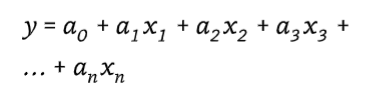
Where y is the target and $x_{1}x_{2}$
 are predictor variables or features.

 Linear regression that only involves one feature is known as simple linear regression while that with multiple features is known as multiple linear regression $a_{0}a_{1}...a_{n}$ are known as paramaters (also known as coefficients or weights.) The main objective of linear regression algo is to determine the best values for these params

 The idea behind **linear regression** is straightforward. The algo tries to draw a line that best fits the given data. This line is known as the regression line and presents the predicted values generate by the algo.

 **Choosing the best line**

 We need to minimize what is known as the cost function. A commonly used cost function is **Mean Squared error (MSE)** A data point's error refers to the distance between its predicted and actual value. The error is known as a **residual**. The objective is to find the set of params that results in the smallest MSE.

 In theory Linear regression needs to consider all possible values of the parameters and a select set of parameters that will result in a line with the smallest MSE. This however is impossible to do so because there is an infinite number of possible values. So the algorithm uses math techniques to find the set of optimal parameters instead. These techniques include solving a matrix equation known as the normal equation or using a technique called gradient descent to try different sets of params iteratively. We can use the **linearRegression** class to solve the programmatically.



# 6.3 Linear regression with Scikit-Learn

We will be building a **LinearRegression** model with the **LinearRegression** class based on the housing.csv file

See sample code below:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

housing = pd.read_csv('housing.csv')

housing.head()

,Floor Area (sqft),Value ($1000)
0,665.0,161.0
1,442.0,83.0
2,302.0,53.0
3,336.0,57.0
4,673.0,152.0


The datasets consists of two columns Floor Area (sqft) and Value ($1000)

In [18]:
#Checking for any null values in the csv
housing.isnull().sum()

Floor Area (sqft)    0
Value ($1000)        0
dtype: int64

In [19]:
#Splitting the dataset
X = housing[['Floor Area (sqft)']]

y = housing['Value ($1000)']
#splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

Setting **test_size** as 0.2 means we want to use 20% for testing data.

**random_state** this param controls the shuffling applied to the data the number 42 has no special meaning. I am only following the instructions within the book this can be any integer desired.



Text(0, 0.5, 'Price in $1000s')

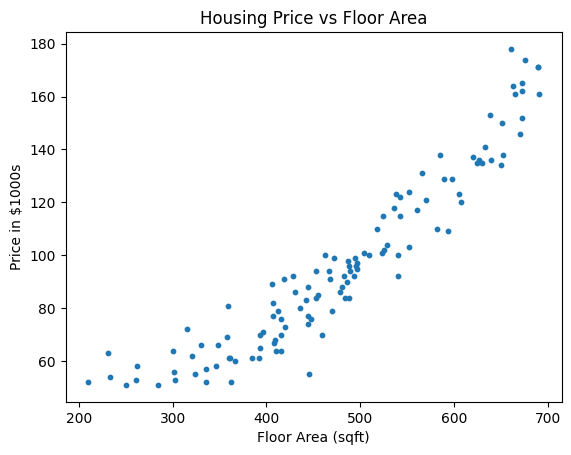

In [20]:
#creating a scatter plot with the data
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)
plt.title('Housing Price vs Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Price in $1000s')

In [21]:
#Training the model

lr = LinearRegression()
#fitting the training data to minimize cost function
#This does not return a value, but it update the coef_ and intercept_ attributes
lr.fit(X_train,y_train)

print(lr.intercept_)
print(lr.coef_)

-29.6514648875731
[0.2640654]


In [22]:
#finding the predicted price the array takes floor area as values
#we are trying to predict what the price may be.
predicted_price = lr.predict([[250], [300]])
print(predicted_price)

[36.3648842  49.56815401]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


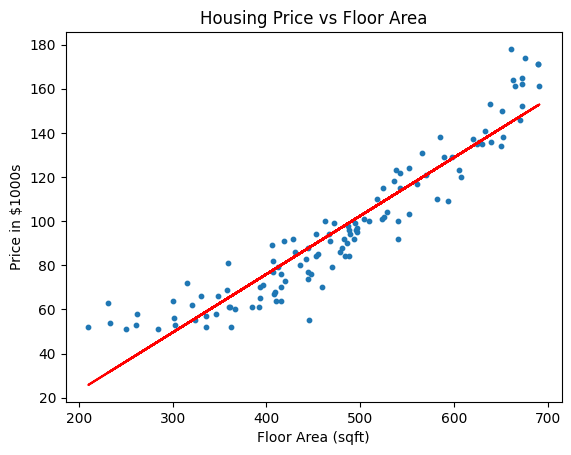

In [23]:
# Plotting the scatter plot of the training data
# X_train['Floor Area (sqft)'] represents the feature (independent variable) - floor area of houses in square feet
# y_train represents the target variable - price of the houses in $1000s
# 's=10' specifies the size of the markers used in the scatter plot
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)

# Predicting the house prices (y_pred) using the linear regression model 'lr' and the training data
y_pred = lr.predict(X_train)

# Plotting the regression line
# X_train['Floor Area (sqft)'] is again the floor area which is the independent variable
# y_pred is the predicted prices based on the linear regression model
# This line represents the model's predictions across the range of floor area values
plt.plot(X_train['Floor Area (sqft)'], y_pred, color='red')

# Setting the title of the plot
plt.title('Housing Price vs Floor Area')

# Setting the label for the x-axis
plt.xlabel('Floor Area (sqft)')

# Setting the label for the y-axis
plt.ylabel('Price in $1000s')

# Displaying the plot
plt.show()


In [24]:
# Calculating the Root Mean Squared Error (RMSE) between the actual and predicted house prices
# y_train: actual prices of the houses in the training set
# y_pred: predicted prices from the linear regression model
# squared=False parameter calculates the square root of the mean squared error to get RMSE
RMSE = mean_squared_error(y_train, y_pred, squared=False)

# Calculating the coefficient of determination, also known as R-squared (r2)
# It measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s)
# A higher r2 value indicates a better fit between the prediction and actual value
r2 = r2_score(y_train, y_pred)

# Printing the RMSE to evaluate the model performance
# Lower RMSE values indicate a better fit of the model to the data
print("RMSE:", RMSE)

# Printing the R-squared value to assess the model's explanatory power
# Values closer to 1 indicate a model that perfectly explains the variability in the target variable
print("R-squared:", r2)


RMSE: 11.426788012892116
R-squared: 0.8827389714759885


In [25]:
# Predicting the house prices for the test set using the linear regression model 'lr'
# X_test contains the features (independent variables) of the test set
y_pred_test = lr.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the test set predictions
# y_test: actual prices of the houses in the test set
# y_pred_test: predicted prices from the model for the test set
# The squared=False parameter indicates that the square root of the MSE should be returned, giving us the RMSE
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)

# Calculating the coefficient of determination, R-squared (r2), for the test set predictions
# This metric gives us an indication of the goodness of fit of the model
# It measures the proportion of variance in the dependent variable that can be predicted from the independent variable(s)
r2 = r2_score(y_test, y_pred_test)

# Printing the RMSE to evaluate the accuracy of the model on the test set
# A lower RMSE indicates better performance, meaning the model's predictions are closer to the actual values
print("Test RMSE:", RMSE)

# Printing the R-squared value to assess how well the model explains the variance in the test set
# Values closer to 1 indicate a higher proportion of variance in the dependent variable being predictable from the independent variables
print("Test R-squared:", r2)


Test RMSE: 10.413298895214577
Test R-squared: 0.9229207556091985


# 6.4 Polynomial Regression


The linear regression socred in the previou s section were good, but could they be better?

Look at the scatterplot above it looks like tyhe values in the bottom left of the chart follows more of a quadratic curve rather than a straight regression line.

This is where polynominal regression comes in we can use it to test to see if the quadratic curve would fit this better.

The objective of polynominal regressionalgo is to find a set of coefficients that resut in the smallest MSE. We can do that with sklearn.

# 6.5 Polynomial Regression with Scikit-Learn

It is similiar in fashin to the **LinearRegression** model because both does use the **LinearRegression** class. This is because we can transform a polynomial equation into a linear equation.

Fortunately instead of doing all of the mathematics by hand from adding additional features to the equation. We can use **PolynomialFeatures**

In [26]:
# Importing the necessary module
from sklearn.preprocessing import PolynomialFeatures

# Creating an instance of PolynomialFeatures class with degree=2
poly_features = PolynomialFeatures(degree=2)

# Transforming the input features X_train into polynomial features
X_trained_transformed = poly_features.fit_transform(X_train)

# Printing the transformed features
print(X_trained_transformed[0])

[1.00000e+00 6.91000e+02 4.77481e+05]


**Above values explained**

1.00000e+00 = 1 is the value for (floor area)$^0$

6.91000e+02 = 691 is the value of (Floor area)$^1$

4.77481e+05 = 477481 is the value of (Floors area)$^2$




In [27]:
# Creating an instance of the LinearRegression model
pr = LinearRegression()

# Training the LinearRegression model using the transformed training features (X_trained_transformed)
# and corresponding target values (y_train)
pr.fit(X_trained_transformed, y_train)

# Printing the intercept of the linear regression model
print("Intercept (bias term):", pr.intercept_)

# Printing the coefficients of the linear regression model
print("Coefficients (weights for each feature):", pr.coef_)


Intercept (bias term): 70.91161404547067
Coefficients (weights for each feature): [ 0.         -0.18658297  0.00047343]


**Above values explained**

Based on these params the model estimates that the relationship between house price and floor area can be expressed as:

house price = 70.9+0*(Floor Area)$^0$-0.187*(Floor Area)$^1$+0.000473*(Floor area)$^2$

Now that we have our coeffiocients above we can now predict the housing price by replacing the floor area with the value of the fllor area for example:

house price = 70.9+0*(250)$^0$-0.187*(250)$^1$+0.000473*(250)$^2$

house price=54.7125

This can be acocmplished within code as well by using the models **predict()** method.

See below:

In [28]:
# Transforming the floor area value of 250 into a 2D array using the polynomial features transformation.
num_transformed = poly_features.transform([[250]])

# Using the trained linear regression model 'pr' to predict the price based on the transformed floor area.
predicted_price = pr.predict(num_transformed)

# Displaying the predicted price calculated by the linear regression model.
print(predicted_price)


[53.85545111]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Price in $1000s')

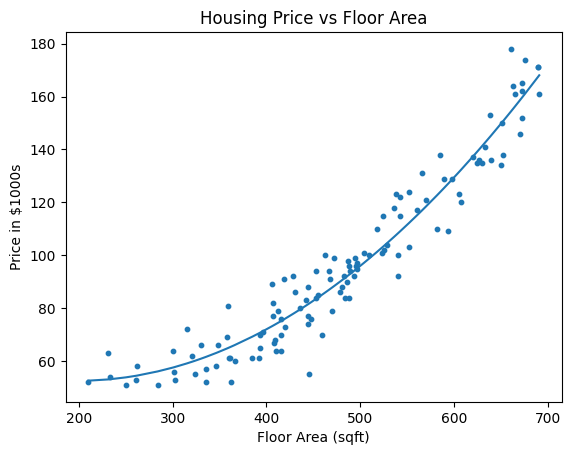

In [29]:
# Plotting a scatter plot to visualize the relationship between floor area and house prices.
plt.scatter(X_train['Floor Area (sqft)'], y_train, s=10)

# Predicting house prices using the trained linear regression model and plotting the curve.
y_pred = pr.predict(X_trained_transformed)
# Sorting the predicted values based on the floor area for a smooth curve.
sorted_zip = sorted(zip(X_train['Floor Area (sqft)'], y_pred))
X_train_sorted, y_pred_sorted = zip(*sorted_zip)
# Plotting the curve using the sorted floor area values and corresponding predicted prices.
plt.plot(X_train_sorted, y_pred_sorted)

# Adding labels to the chart for clarity.
plt.title('Housing Price vs Floor Area')
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Price in $1000s')


In [30]:
# Importing necessary functions from sklearn.metrics module for evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Calculating Root Mean Squared Error (RMSE) between actual and predicted values on the training subset
RMSE = mean_squared_error(y_train, y_pred, squared=False)
# Calculating R-squared (coefficient of determination) between actual and predicted values on the training subset
r2 = r2_score(y_train, y_pred)

# Printing the RMSE (Root Mean Squared Error)
print("Root Mean Squared Error (RMSE):", RMSE)
# Printing the R-squared value
print("R-squared (R2) Score:", r2)


Root Mean Squared Error (RMSE): 8.522835594847724
R-squared (R2) Score: 0.9347660644643525


In [31]:
# Transforming the features of the test subset using the same polynomial features transformation
X_test_transformed = poly_features.transform(X_test)

# Predicting target values for the test subset using the trained linear regression model
y_pred_test = pr.predict(X_test_transformed)

# Calculating Root Mean Squared Error (RMSE) between actual and predicted values on the test subset
RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
# Calculating R-squared (coefficient of determination) between actual and predicted values on the test subset
r2 = r2_score(y_test, y_pred_test)

# Printing the RMSE (Root Mean Squared Error)
print("Root Mean Squared Error (RMSE) on test subset:", RMSE)
# Printing the R-squared value on test subset
print("R-squared (R2) Score on test subset:", r2)


Root Mean Squared Error (RMSE) on test subset: 6.425083465019809
R-squared (R2) Score on test subset: 0.9706560666441122


# 6.6 Pipeline

In this section we can combine what we learned in the last section into 1. to do that we need to do 2 things first we need to create additional features using the **PolynomialFeatures** class after creating the features we pass them to linear regression algo to train our model.

These can be combined using **Pipeline**

See code below:



In [33]:
from sklearn.pipeline import Pipeline

#creating the pipeline
pipeline = Pipeline([('poly', PolynomialFeatures(degree=2)), ('model', LinearRegression())])

#training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('model', LinearRegression())])

First we instantiate the pipeline class and pass in two tuples to its constructor. The first tuple is for **PolynomialFeatures** estimator while the second is for the **LinearRegression** estimator.

After instantiating we have to train our model by calling the object **fit()** method. When we do that sklearn calls the **fit_transform()** method of the **PolynomialFeatures** estimators and passes the output to the **fit()** method of **LinearRegression**

Once that is done then the training is complete. we can now use the **predict()** method to try and make predictions

In [35]:
#prediction test
print(pipeline.predict([[250]]))

[53.85545111]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [39]:
# Evaluating the model on the training set

# Predicting target values for the training set using the trained model (pipeline)
y_pred = pipeline.predict(X_train)

# Calculating Root Mean Squared Error (RMSE) between actual and predicted values on the training set
print("Root Mean Squared Error (RMSE) on training set:", mean_squared_error(y_train, y_pred, squared=False))

# Calculating R-squared (coefficient of determination) between actual and predicted values on the training set
print("R-squared (R2) Score on training set:", r2_score(y_train, y_pred))


# Evaluating the model on the test set

# Predicting target values for the test set using the trained model (pipeline)
y_pred_test = pipeline.predict(X_test)

# Calculating Root Mean Squared Error (RMSE) between actual and predicted values on the test set
print("Root Mean Squared Error (RMSE) on test set:", mean_squared_error(y_test, y_pred_test, squared=False))

# Calculating R-squared (coefficient of determination) between actual and predicted values on the test set
print("R-squared (R2) Score on test set:", r2_score(y_test, y_pred_test))


Root Mean Squared Error (RMSE) on training set: 8.522835594847724
R-squared (R2) Score on training set: 0.9347660644643525
Root Mean Squared Error (RMSE) on test set: 6.425083465019809
R-squared (R2) Score on test set: 0.9706560666441122


You can see how the values that are output here match the same values that we were getting previously without using **pipeline** using pipeline now streamlines the process substantially. We no longer need to store the output of **PolynomialFeatures** class.

# 6.7 Cross-Validation

Besides simplifying our work flow **pipeline** also helps to prevent data leakage when we do **cross-validation**

Data leaks occur when information from the outside of our training set such as test sets is used to train the model.

when discusssing preprocssessing previously we mentioned that we should only call the transform() method on the test set and not the fit() or fit_transform() method. this ensures that data from the test set is not used to train the model which is the correct approach.

the same applies to cross-validation.

If we need to do any data preprocessing on our data-set we should call the fit() or fit_transform() method on the k1 training folds and only call the transform() or predict() method on the validation fold().

Doing all of the above would be far too tedious luckily we can accomplish all of it with pipeline.

see code below:

In [40]:
# Importing necessary function from sklearn.model_selection module for cross-validation
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate the performance of the model
# cv is the number of folds, which determines how the dataset is split into train-test sets
# Here, cv=3 means the dataset is split into 3 equal-sized folds for cross-validation
# pipeline represents the machine learning model to be evaluated (e.g., a regression or classification model)
# X_train and y_train are the features and target values of the training dataset, respectively
# scoring="neg_root_mean_squared_error" specifies the evaluation metric to use, which is negative root mean squared error (RMSE)
# Cross-validation computes the RMSE for each fold and returns an array of scores
scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="neg_root_mean_squared_error")

# Calculating the mean of the negative RMSE scores obtained from cross-validation
# Negative RMSE is used because cross_val_score returns negative values by default
# Taking the mean gives an overall assessment of the model's performance across all folds
neg_rmse = scores.mean()

print(neg_rmse)

-8.615541039554303


Scoring criteria that is passed in as a string can be found at this URL: https://scikit-learn.org/stable/modules/model_evaluation.html

In [42]:
# we can also use the cross_val_score to get the r2 score
scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')
r2 = scores.mean()

print(r2)

0.9291077625814611
